In [261]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [262]:
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv('irisdata.csv', names=column_names, header=None)

In [263]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [264]:
data = df

alt.Chart(data).mark_circle().encode(
    alt.X('petal_length').scale(zero=False),
    alt.Y('petal_width').scale(zero=False, padding=2),
    color='class',
    size='sepal_width', 
).properties(
    width=500,
    height=300, 
    title = 'Features acting on classes'
).interactive()


alt.Chart(...)

In [265]:
class_encoding = {
    "Iris-setosa": 1, 
    "Iris-versicolor": 2,
    "Iris-virginica": 3
}

df['class'] = df['class'].map(class_encoding)

In [266]:
X = df.drop('class', axis=1)
y = df['class']

In [267]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [268]:
error = []
for c in range (1, 11):
    model = svm.SVC(kernel='linear', C=c)
    y_pred = cross_val_predict(model, X, y, cv=5)
    error.append(classification_report(y, y_pred))

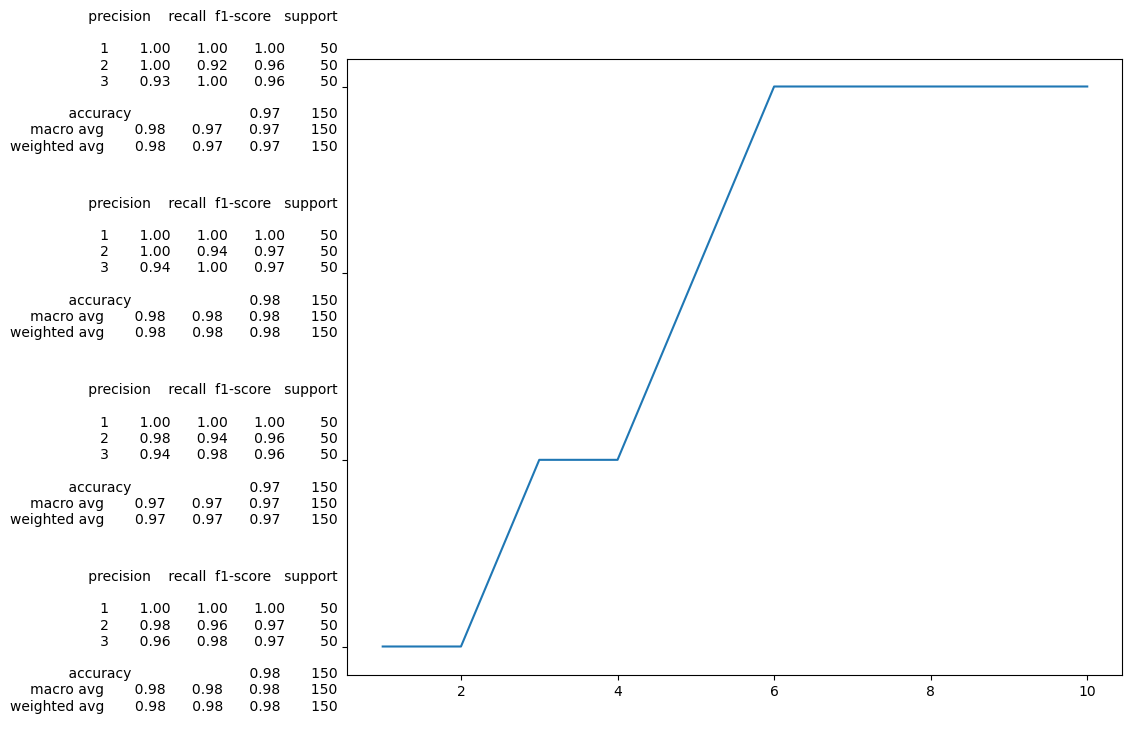

In [269]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), error)

In [270]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [271]:
model = SVC(kernel='linear', C=3).fit(X_reduced, y)

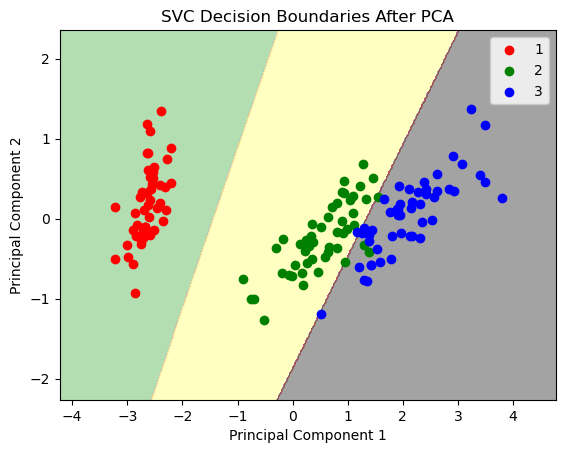

In [272]:
# Create a meshgrid of points for the two selected features
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1

h = 0.02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the trained classifier to predict the class labels for points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.6)

# Plot data points using actual class labels for coloring and labeling
colors = ['red', 'green', 'blue']
for c, i, target in zip(colors, [1, 2, 3], df['class'].unique()):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], c=c, label=target)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Decision Boundaries After PCA')
plt.legend()
plt.show()